<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/data_Analytics_Tutorial_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics TUtorial Assignment

## Tools: Python (Pandas & Numpy)

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Part 1: Data Loading & Understanding

##  Load the dataset using Pandas.

In [50]:
# Dataset has been added as a file to google colab file section and ready to be exported.

Automobile = pd.read_csv('Automobile.csv')


 ## Display the first 5 and last 5 rows
 ## Check shape, column names, and data types
 ##  Use info() and describe() to summarize the dataset.

In [51]:
print(Automobile.info()) # Display info
print(Automobile.head(5)) # Display first 5 rows
print(Automobile.tail(5)) # Display the last 5 rows
print(Automobile.describe()) # Display summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         3

#  Data Cleaning

##  Identify and handle missing values.
##  Remove duplicate records if any.
## Correct incorrect data types.
##  Rename columns for clarity

In [52]:
# Handle Missing Values
Automobile.dropna(inplace=True)

In [53]:
# Remove Duplicates
Automobile.drop_duplicates(inplace=True)

In [54]:
print(Automobile.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None


In [55]:
# Correct incorrect Data types
Automobile['name'] = Automobile['name'].astype('string')
Automobile['origin'] = Automobile['origin'].astype('category')
print(Automobile.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   name          392 non-null    string  
 1   mpg           392 non-null    float64 
 2   cylinders     392 non-null    int64   
 3   displacement  392 non-null    float64 
 4   horsepower    392 non-null    float64 
 5   weight        392 non-null    int64   
 6   acceleration  392 non-null    float64 
 7   model_year    392 non-null    int64   
 8   origin        392 non-null    category
dtypes: category(1), float64(4), int64(3), string(1)
memory usage: 28.1 KB
None


In [56]:
# Renaming columns for clarity
Automobile = Automobile.rename(columns={'name': 'model'})
print(Automobile.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         392 non-null    string  
 1   mpg           392 non-null    float64 
 2   cylinders     392 non-null    int64   
 3   displacement  392 non-null    float64 
 4   horsepower    392 non-null    float64 
 5   weight        392 non-null    int64   
 6   acceleration  392 non-null    float64 
 7   model_year    392 non-null    int64   
 8   origin        392 non-null    category
dtypes: category(1), float64(4), int64(3), string(1)
memory usage: 28.1 KB
None


# Data Preprocessing
## Encode Categorical Variables
## Apply feature scaling if required.
##  Split data into features (X) and target (y).

In [57]:
# Enode categorical Variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Automobile['origin_encoded'] = le.fit_transform(Automobile['origin'])

In [58]:
# Split Data into Features and Target
X = Automobile.drop(['origin', 'origin_encoded', 'model'], axis=1)
y = Automobile['origin_encoded']

In [59]:
# Import needed lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [60]:
# Aplly Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data Visualization
##  Histogram of a numerical feature
##  Box plot for outlier detection
##  Bar chart for categorical variables
##  Scatter plot between two numerical features.
## Correlation heatmap.


Text(0, 0.5, 'Frequency')

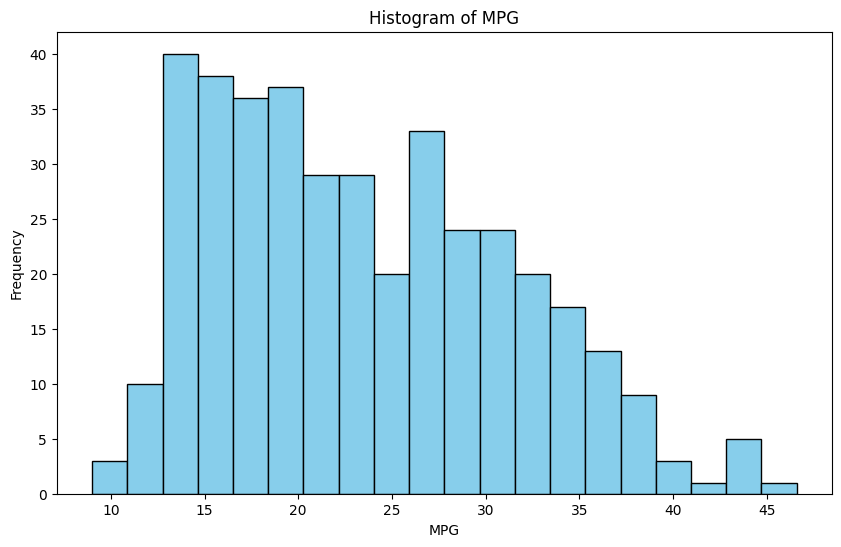

In [61]:
# Histogram of numerical features
plt.figure(figsize=(10, 6))
plt.hist(Automobile['mpg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')

Text(0, 0.5, 'MPG')

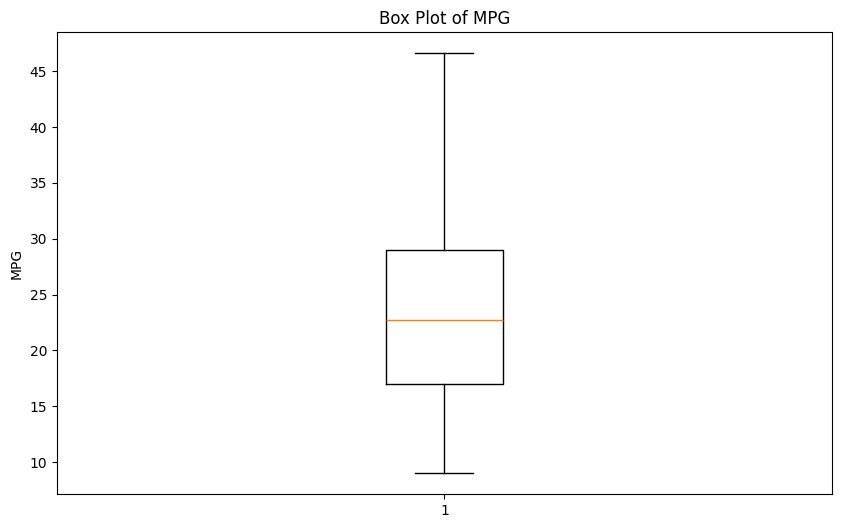

In [62]:
# Box plot of outlier detection
plt.figure(figsize=(10, 6))
plt.boxplot(Automobile['mpg'])
plt.title('Box Plot of MPG')
plt.ylabel('MPG')

Text(0, 0.5, 'Count')

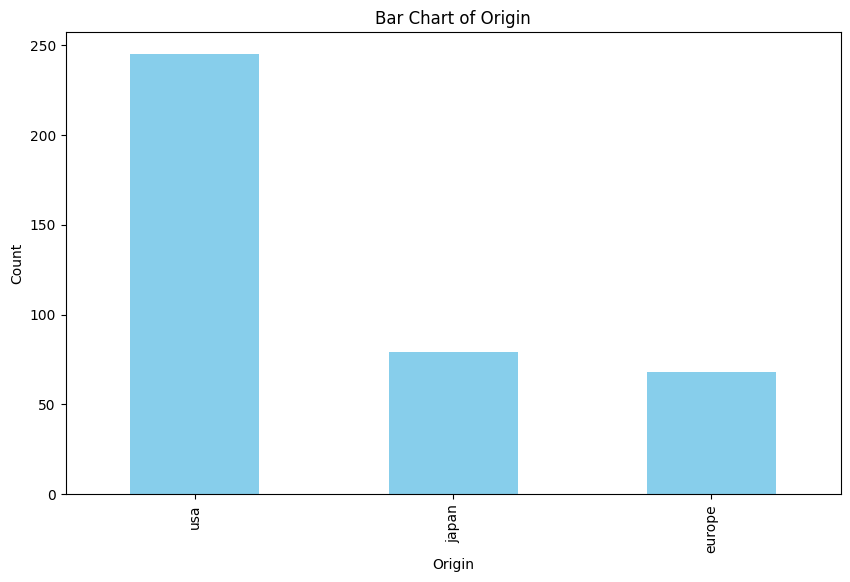

In [63]:
# Bar chart for Categorical variables
plt.figure(figsize=(10, 6))
Automobile['origin'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Origin')
plt.xlabel('Origin')
plt.ylabel('Count')

Text(0, 0.5, 'Cylinders')

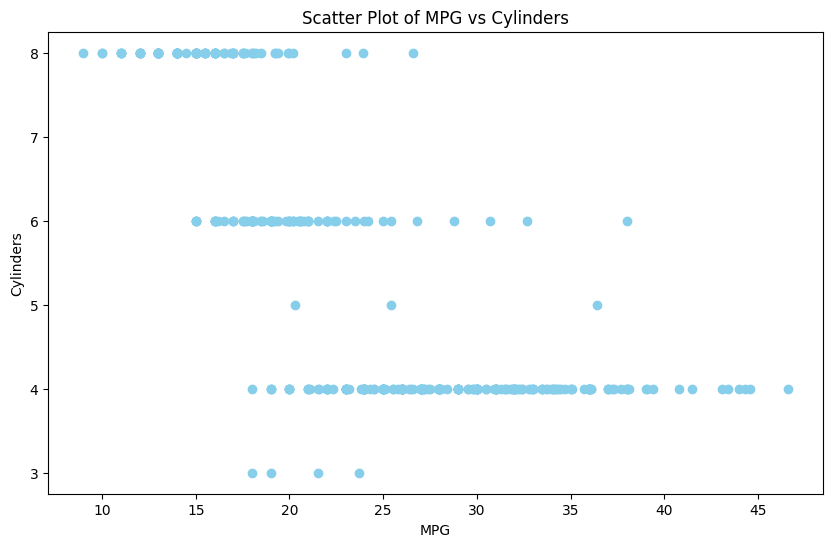

In [64]:
# Scatter plot between two numerical features
plt.figure(figsize=(10, 6))
plt.scatter(Automobile['mpg'], Automobile['cylinders'], color='skyblue')
plt.title('Scatter Plot of MPG vs Cylinders')
plt.xlabel('MPG')
plt.ylabel('Cylinders')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

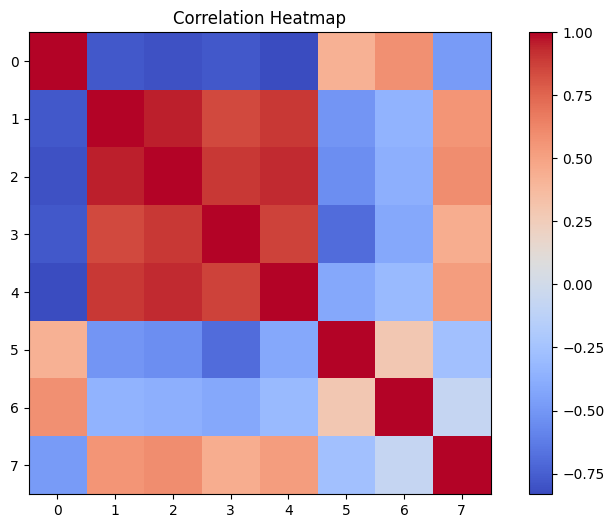

In [65]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = Automobile.corr(numeric_only=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap')
plt

# Linear Regression
## Split data into training and testing sets.
## Train a Linear Regression model.
## Evaluate using MAE, MSE, and R² score.
## Plot actual vs predicted values.


In [66]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
# Train a Linear Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
# Evaluate using MAE, MSE and  R² score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))

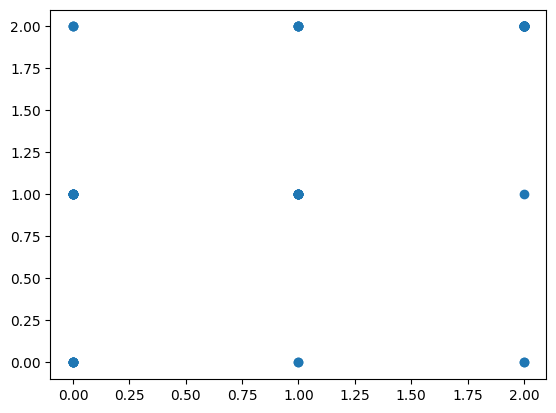

In [69]:
# make a plot of actual vs predicted values
plt.scatter(y_test, y_pred)